In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scikitplot as skplt

In [3]:
#import data and add header row
news = pd.read_csv("NewsAggregatorDataset/newsCorpora.csv", sep="\t",
                  names=["ID", "TITLE", "URL", "PUBLISHER", "CATEGORY", "STORY", "HOSTNAME", "TIMESTAMP"])
#lowercase text and removing punctuation in title to have smaller size of model in future
import string

def normalize(s):
    s = s.lower()
    s = s.translate(str.maketrans('','', string.punctuation))
    return s

news['TITLE'] = [normalize(s) for s in news['TITLE']]

In [4]:
#first six rows
news.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,fed official says weak data caused by weather ...,http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,feds charles plosser sees high bar for change ...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,us open stocks fall after fed official hints a...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,fed risks falling behind the curve charles plo...,http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,feds plosser nasty weather has curbed job growth,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(news['TITLE'])

In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(news['CATEGORY'])

In [7]:
X.shape

(422419, 71489)

In [8]:
y.shape

(422419,)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)

X_train.shape, y_train.shape


((253451, 71489), (253451,))

In [10]:
X_test.shape, y_test.shape

((168968, 71489), (168968,))

In [11]:
clf = LinearSVC(loss='squared_hinge', max_iter=30).fit(X_train, y_train)

In [12]:
clf.score(X_train, y_train)

0.9794358672879571

In [13]:
clf.score(X_test, y_test)

0.9442024525353914

In [20]:
#computing cross validation metrics
from sklearn.model_selection import cross_val_score
from sklearn import metrics
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro')
scores

array([0.94035222, 0.93992152, 0.93809165, 0.93941957, 0.93891589])

In [21]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.94 (+/- 0.00)


In [23]:
scores_test = cross_val_score(clf, X_test, y_test, cv=5)
scores_test

array([0.93641071, 0.93679351, 0.93741307, 0.93679164, 0.93723552])

In [25]:

print("Accuracy: %0.2f (+/- %0.2f)" % (scores_test.mean(), scores_test.std() * 2))

Accuracy: 0.94 (+/- 0.00)


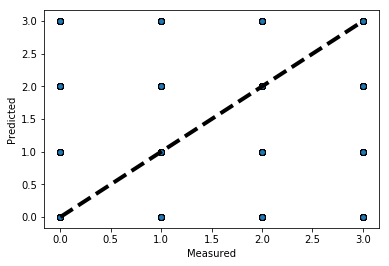

In [27]:
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

X = X_train
y = y_train

predicted = cross_val_predict(clf, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [26]:
import plotly
import plotly.graph_objs as go

predicted_plotly = cross_val_predict(clf, X, y, cv=10)
predicted_plotly



array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [27]:


trace1 = go.Scatter(x=y, y=predicted_plotly, mode='markers',
                    marker = dict(size=8,
                                  color='rgb(0, 0, 255)',
                                  line=dict(
                                    width=2,
                                    color='rgb(0, 0, 0)'))
                   )
trace2 = go.Scatter(x=[y.min(), y.max()],y=[y.min(), y.max()],
                    line = dict(color=('rgb(0, 0, 0)'),
                                width=5, dash='dash')
                   )
layout = go.Layout(showlegend=False,
                   yaxis=dict(
                    range = [-10,60],
                    zeroline=False,
                    title='Predicted'),
                   xaxis=dict(
                    title='Measured',)
                  )


fig = go.Figure(data = [trace1,trace2], layout = layout)
plotly.offline.plot(fig, filename="predicted_plotly.html")


'file://C:\\Users\\kzaytseva\\PycharmProjects\\TextClass\\predicted_plotly.html'